About Dataset
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
This dataset is for ABC Multistate bank with following columns:

customer_id, unused variable.
credit_score, used as input.
country, used as input.
gender, used as input.
age, used as input.
tenure, used as input.
balance, used as input.
products_number, used as input.
credit_card, used as input.
active_member, used as input.
estimated_salary, used as input.
churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.
Aim is to Predict the Customer Churn for ABC Bank.

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Autoencoder%20for%20Customer%20Churn.ipynb

https://towardsdatascience.com/spurned-in-a-survival-forest-customer-churn-prediction-in-python-2083551f3cc5


https://medium.com/search?q=customer+churn+with+python

https://www.kaggle.com/search?q=bank+customer+churn+prediction

https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction

https://www.kaggle.com/code/bandiang2/prediction-of-customer-churn-at-a-bank

https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction

In [1]:
#!pip install PySurvival

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go #visualization
import plotly.offline as py #visualization

from sklearn.model_selection import train_test_split

#from pysurvival.utils.display import correlation_matrix, compare_to_actual, \
#       integrated_brier_score, create_risk_groups
#from pysurvival.utils.metrics import concordance_index      
#from pysurvival.models.survival_forest import ConditionalSurvivalForestModel

In [3]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [4]:
df=data.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EDA ANALYSIS

In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [6]:
df.info()  # df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()  

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457


In [9]:
df.select_dtypes(exclude="object").nunique()  # This expanded dataframe will enable us to run data science models that can quantify the influence of the feature variables on the churn risk.

customer_id         10000
credit_score          460
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [10]:
df.shape

(10000, 12)

In [11]:
# Check columns list and missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [12]:
# Get unique count for each variable
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [13]:
# Drop the columns as explained above
df = df.drop("customer_id", axis = 1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Check variable data types
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_13980\2858323205.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

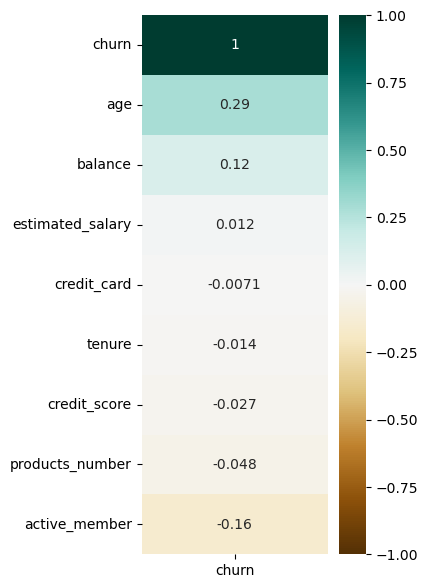

In [15]:
plt.figure(figsize=(3,7))
sns.heatmap(df.corr()[["churn"]].sort_values(by="churn",ascending=False), annot=True, cmap='BrBG',vmin=-1)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_13980\1286988785.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 2000x1000 with 0 Axes>

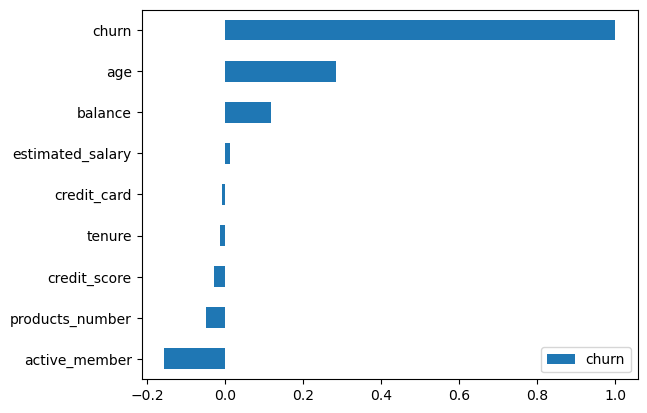

In [16]:
plt.figure(figsize=(20,10))
df.corr()[["churn"]].sort_values(by="churn").plot.barh();

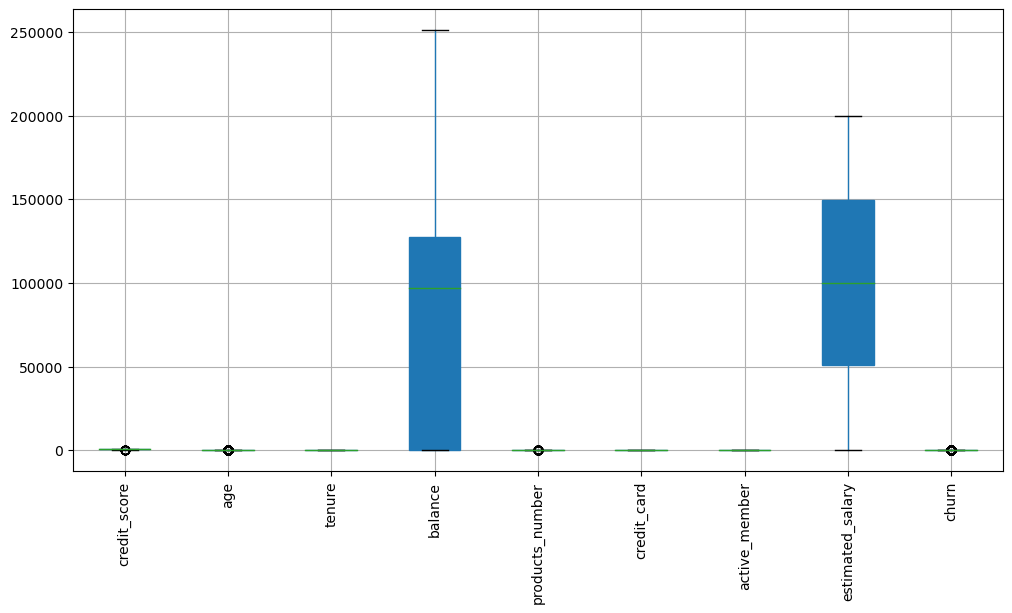

In [17]:
plt.figure(figsize=(12,6))
bplot = df.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

In [18]:
#function  for pie plot for customer attrition types

target_col = ["churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]

#Separating churn and non churn customers
churn     = df[df["churn"] == 1]
not_churn = df[df["churn"] == 0]


def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
#for all categorical columns plot pie
#for i in cat_cols :
    #plot_pie(i)

In [19]:
# Calling the function for plotting the pie plot for geography column
plot_pie(cat_cols[0])

customer_id

In [20]:
#df.duplicated(subset=['customer_id']).sum()

In [21]:
#df[df["customer_id"]& df["churn"]==1]  

churn

In [22]:
df.churn.value_counts(dropna=False)

0    7963
1    2037
Name: churn, dtype: int64

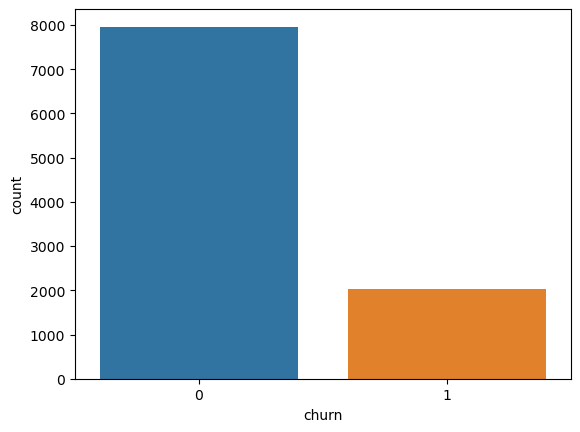

In [23]:
sns.countplot(x=df.churn, data=df)
plt.show()

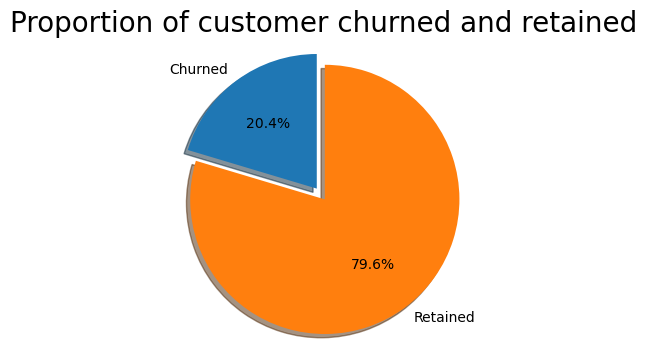

In [24]:
labels = 'Churned', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [25]:
fig = px.pie(df, "churn", color='churn', hole=.3)
fig.show()

In [26]:
df.groupby('churn').mean()

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_13980\1225536199.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


credit_score

In [27]:
df.credit_score.min()

350

In [28]:
df.credit_score.max()

850

In [29]:
df.credit_score.mean()

650.5288

In [30]:
df.credit_score.value_counts(dropna=False)

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: credit_score, Length: 460, dtype: int64

<AxesSubplot: xlabel='credit_score', ylabel='count'>

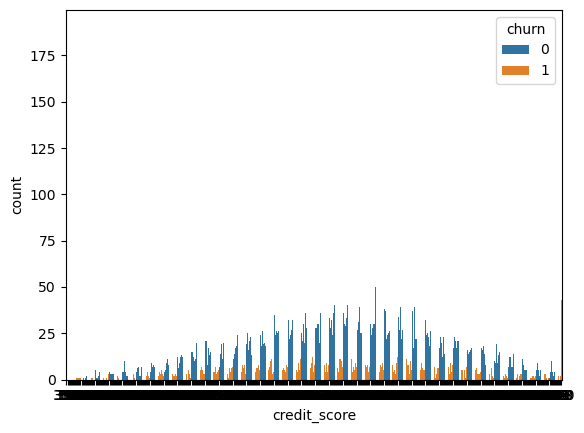

In [31]:
sns.countplot(x='credit_score', hue = 'churn',data = df)

<AxesSubplot: xlabel='churn', ylabel='credit_score'>

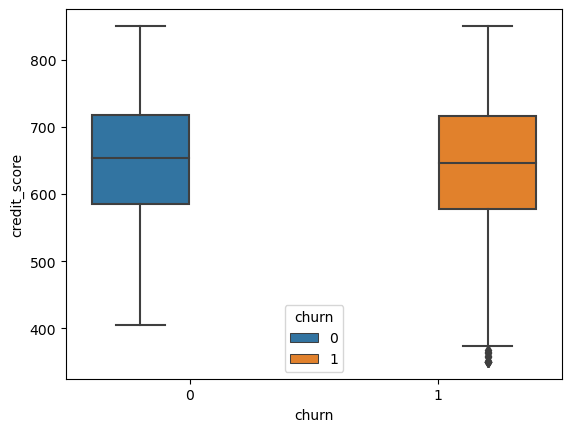

In [32]:
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = df)

country

In [33]:
df.country.value_counts(dropna=False)

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

<AxesSubplot: >

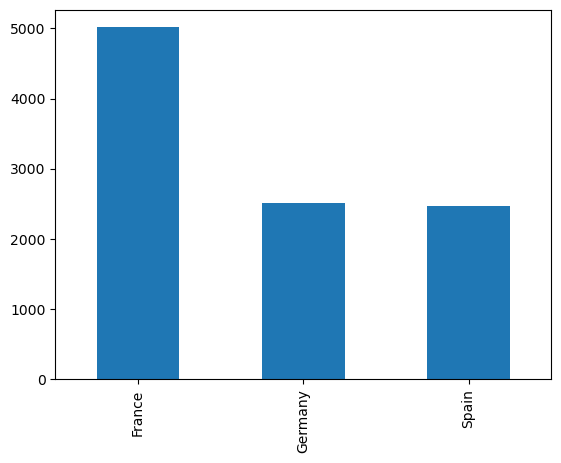

In [34]:
df.country.value_counts(dropna=False).plot(kind="bar")

In [35]:
df.groupby("country")["churn"].value_counts()

country  churn
France   0        4204
         1         810
Germany  0        1695
         1         814
Spain    0        2064
         1         413
Name: churn, dtype: int64

<AxesSubplot: xlabel='country', ylabel='count'>

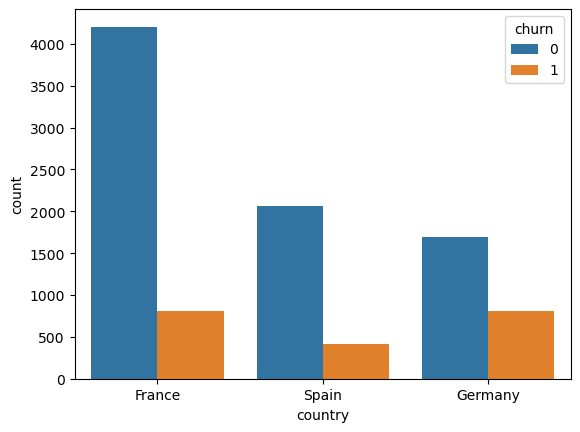

In [36]:
sns.countplot(x='country', hue = 'churn',data = df)

In [37]:
df[(df["country"]=="Germany")&(df["churn"]==1)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
46,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
47,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
53,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1
...,...,...,...,...,...,...,...,...,...,...,...
9960,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9975,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1


In [38]:
len(df[(df["country"] == "France") & (df["churn"]== 1)]) / len(df[(df["country"]=="France")]) *100


16.15476665337056

People of %16,15 who are from France left from the company.

In [39]:
len(df[(df["country"]=="Germany")&(df["churn"]==1)]) / len(df[(df["country"]=="Germany")]) *100

32.44320446392985

People of %32,44 who are from German left from the company.

In [40]:
len(df[(df["country"]=="Spain")&(df["churn"]==1)]) / len(df[(df["country"]=="Spain")]) *100

16.673395236172787

People of %16,67 who are from Spain left from the company.

<AxesSubplot: xlabel='country,churn'>

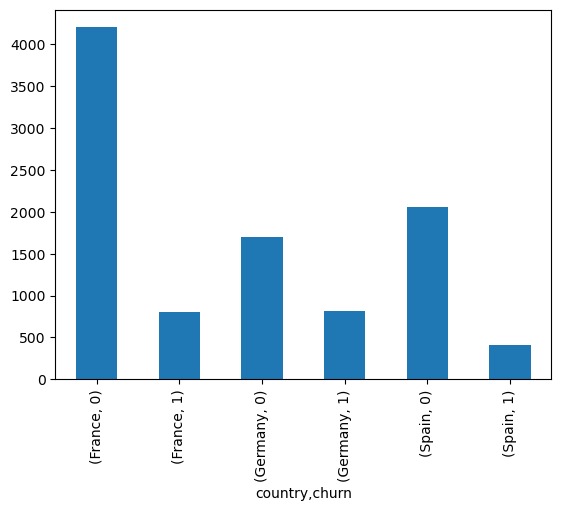

In [41]:
df.groupby("country")["churn"].value_counts().plot(kind="bar")

gender

In [42]:
df.gender.value_counts(dropna=False)

Male      5457
Female    4543
Name: gender, dtype: int64

<AxesSubplot: >

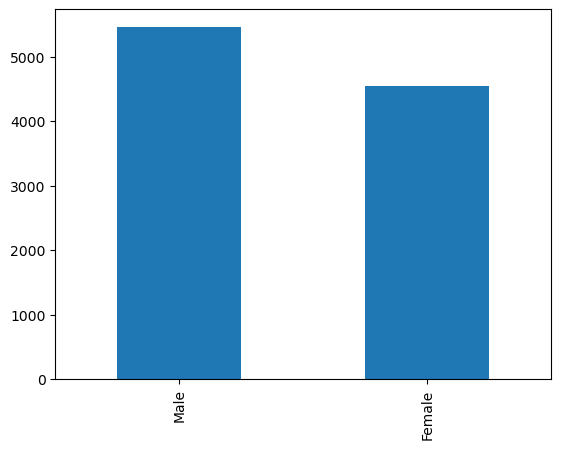

In [43]:
df.gender.value_counts().plot(kind="bar")

In [44]:
df.groupby("gender")["churn"].value_counts()

gender  churn
Female  0        3404
        1        1139
Male    0        4559
        1         898
Name: churn, dtype: int64

In [45]:
len(df[(df["gender"] == "Male") & (df["churn"]== 1)]) / len(df[(df["gender"]=="Male")]) *100

16.455928165658786

%16.45 of male letf from the company among all the male.

In [46]:
len(df[(df["gender"] == "Female") & (df["churn"]== 1)]) / len(df[(df["gender"]=="Female")]) *100

25.071538630860662

%25.07 of female letf from the company among all the female.

<AxesSubplot: xlabel='gender,churn'>

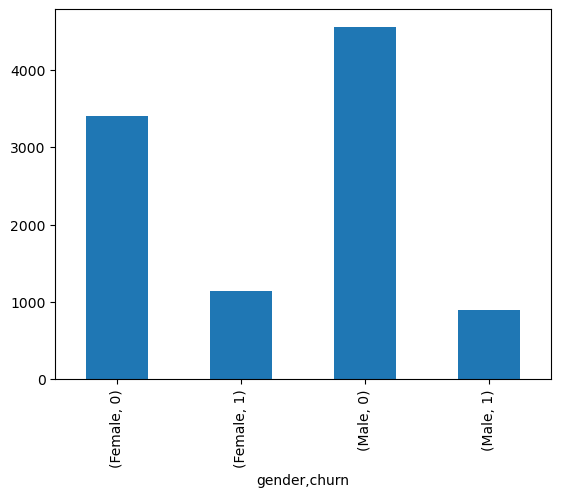

In [47]:
df.groupby("gender")["churn"].value_counts().plot(kind="bar")

<AxesSubplot: xlabel='gender', ylabel='count'>

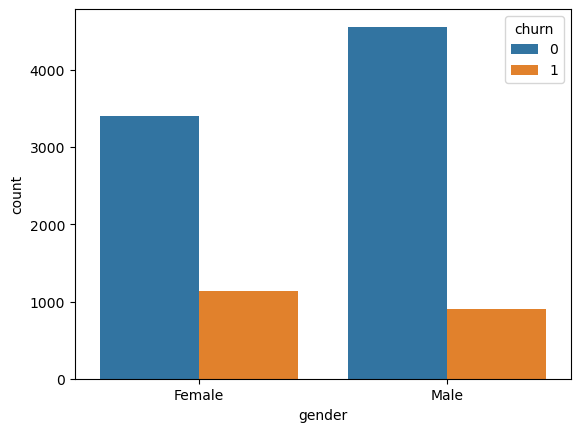

In [48]:
sns.countplot(x='gender', hue = 'churn',data = df)

In [49]:
len(df[(df["gender"]=="Female")&(df["churn"]==1)])

1139

There are totaly 1139 female who left from the company between total people.  

In [50]:
len(df["gender"])

10000

In [51]:
len(df[(df["gender"]=="Female")&(df["churn"]==1)]) / len(df["gender"]) *100

11.39

%11.39 of female left from the company among all the people.

In [52]:
len(df[(df["gender"]=="Male")&(df["churn"]==1)]) / len(df["gender"]) *100

8.98

%8.98 of male left from the company among all the people.

age

In [53]:
df.age.value_counts(dropna=False)

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

<AxesSubplot: >

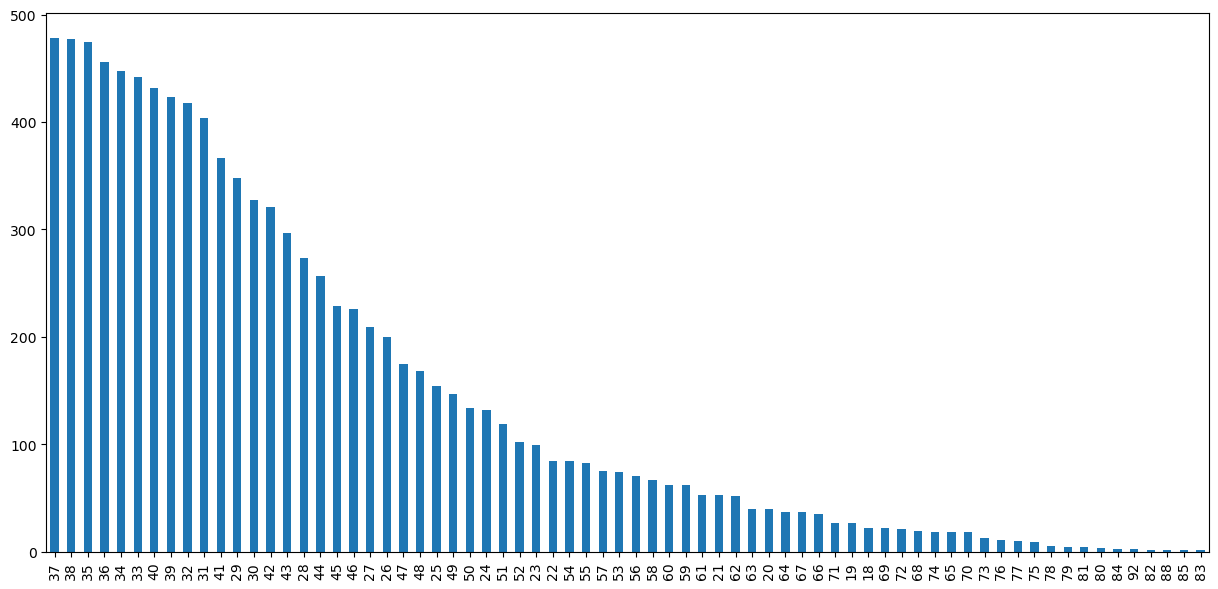

In [54]:
plt.figure(figsize = (15,7))
df["age"].value_counts().plot.bar()

<AxesSubplot: xlabel='age', ylabel='count'>

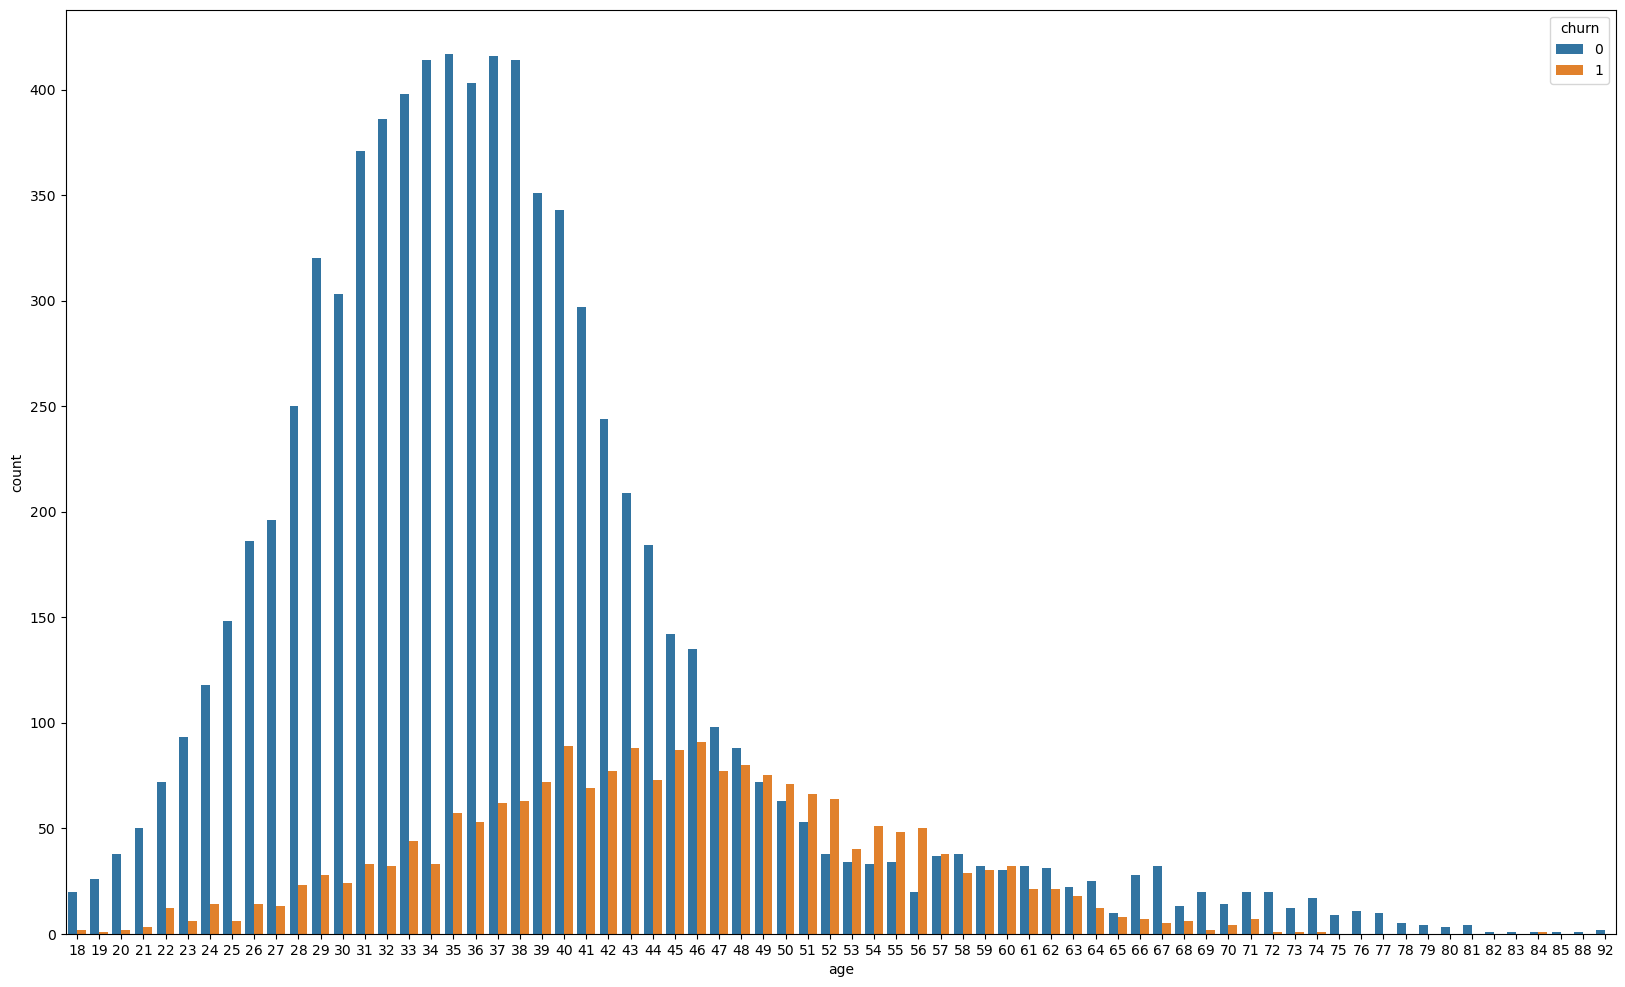

In [55]:
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.countplot(x='age', hue = 'churn',data = df)

<AxesSubplot: xlabel='churn', ylabel='age'>

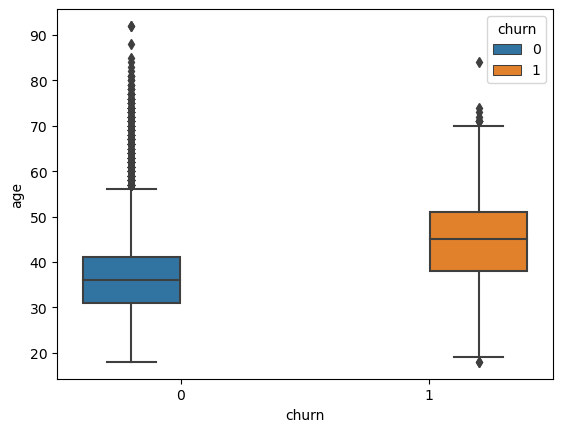

In [56]:
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = df)

In [57]:
df.age.mean()

38.9218

In [58]:
df.age.max()

92

In [59]:
df.age.min()

18

In [60]:
df.groupby("age")["churn"].value_counts(dropna=False)

age  churn
18   0        20
     1         2
19   0        26
     1         1
20   0        38
              ..
84   0         1
     1         1
85   0         1
88   0         1
92   0         2
Name: churn, Length: 128, dtype: int64

In [61]:
df.groupby("age")["churn"].value_counts(dropna=False).sort_values(ascending=False)

age  churn
35   0        417
37   0        416
38   0        414
34   0        414
36   0        403
             ... 
83   0          1
84   0          1
     1          1
85   0          1
88   0          1
Name: churn, Length: 128, dtype: int64

In [62]:
df.groupby("age")["balance"].value_counts()

age  balance  
18   0.00         8
     82767.42     1
     90544.00     1
     93816.70     1
     98894.39     1
                 ..
84   92242.34     1
85   0.00         1
88   0.00         1
92   121513.31    1
     126076.24    1
Name: balance, Length: 6450, dtype: int64

In [63]:
df.groupby("age")["active_member"].value_counts()

age  active_member
18   1                13
     0                 9
19   1                15
     0                12
20   0                21
                      ..
84   0                 1
     1                 1
85   1                 1
88   1                 1
92   1                 2
Name: active_member, Length: 131, dtype: int64

In [64]:
df[["age", "churn"]].value_counts()

age  churn
35   0        417
37   0        416
38   0        414
34   0        414
36   0        403
             ... 
83   0          1
84   0          1
     1          1
85   0          1
88   0          1
Length: 128, dtype: int64

tenure

In [65]:
df.tenure.value_counts(dropna=False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

<AxesSubplot: >

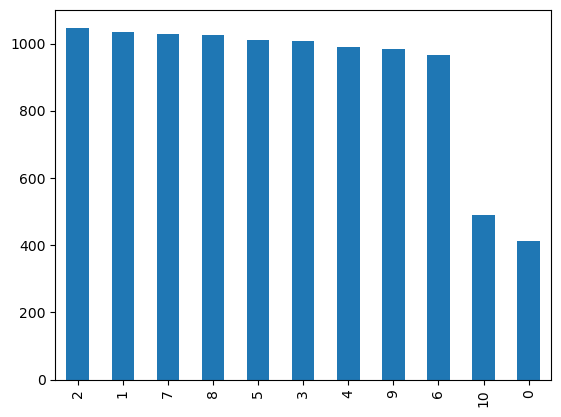

In [66]:
df.tenure.value_counts(dropna=False).plot(kind="bar")

In [67]:
df[(df["tenure"]==0)&(df["churn"]==1)]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
35,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
127,625,Germany,Male,56,0,148507.24,1,1,0,46824.08,1
164,683,Spain,Male,29,0,133702.89,1,1,0,55582.54,1
543,721,Spain,Male,51,0,169312.13,1,1,0,109078.35,1
615,727,Spain,Female,31,0,0.00,1,1,0,121751.04,1
...,...,...,...,...,...,...,...,...,...,...,...
9210,382,Spain,Male,36,0,0.00,1,1,1,179540.73,1
9316,550,Germany,Male,49,0,108806.96,3,1,0,61446.92,1
9624,350,France,Female,40,0,111098.85,1,1,1,172321.21,1
9625,504,Germany,Female,44,0,131873.07,2,1,1,158036.72,1


In [68]:
len(df[(df["tenure"]==0)&(df["churn"]==1)]) / len(df["tenure"]) *100

0.95

In [69]:
len(df[(df["tenure"]==1)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.32

In [70]:
len(df[(df["tenure"]==2)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.01

In [71]:
len(df[(df["tenure"]==3)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.13

In [72]:
len(df[(df["tenure"]==4)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.03

In [73]:
len(df[(df["tenure"]==5)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.09

In [74]:
len(df[(df["tenure"]==6)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.96

In [75]:
len(df[(df["tenure"]==7)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.77

In [76]:
len(df[(df["tenure"]==8)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.97

In [77]:
len(df[(df["tenure"]==9)&(df["churn"]==1)]) / len(df["tenure"]) *100

2.13

In [78]:
len(df[(df["tenure"]==10)&(df["churn"]==1)]) / len(df["tenure"]) *100

1.01

In [79]:
df.groupby("tenure")["churn"].value_counts(dropna=False)

tenure  churn
0       0        318
        1         95
1       0        803
        1        232
2       0        847
        1        201
3       0        796
        1        213
4       0        786
        1        203
5       0        803
        1        209
6       0        771
        1        196
7       0        851
        1        177
8       0        828
        1        197
9       0        771
        1        213
10      0        389
        1        101
Name: churn, dtype: int64

<AxesSubplot: xlabel='tenure', ylabel='count'>

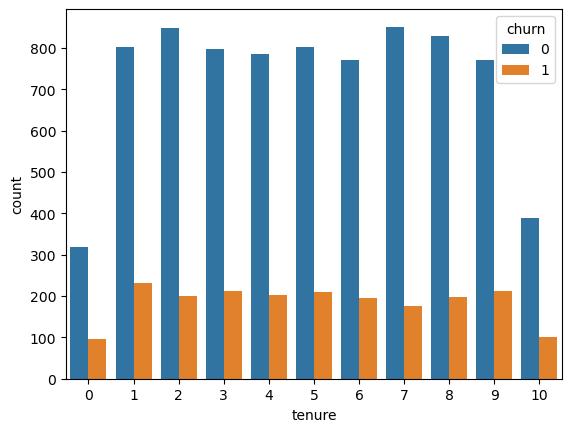

In [80]:
sns.countplot(x='tenure', hue = 'churn',data = df)

<AxesSubplot: xlabel='churn', ylabel='tenure'>

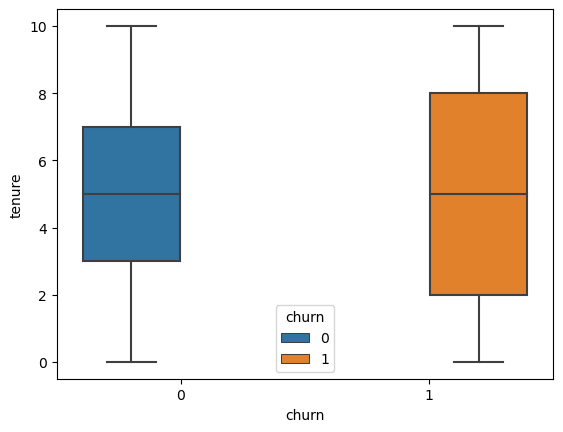

In [81]:
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = df)

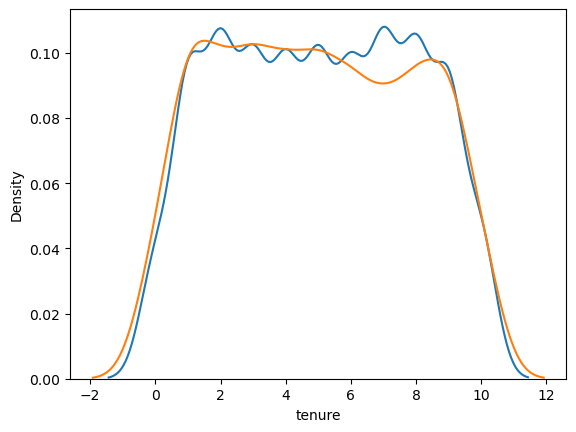

In [83]:
sns.kdeplot(df['tenure'].loc[df['churn'] == 0], label='not churn');  # , shade=True
sns.kdeplot(df['tenure'].loc[df['churn'] == 1], label='churn');  # , shade=True

In [84]:
df['tenure'].loc[df['churn'] == 0].describe()

count    7963.000000
mean        5.033279
std         2.880658
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [85]:
df['tenure'].loc[df['churn'] == 1].describe()

count    2037.000000
mean        4.932744
std         2.936106
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: tenure, dtype: float64

balance

In [86]:
df.balance.value_counts(dropna=False)

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: balance, Length: 6382, dtype: int64

<AxesSubplot: xlabel='balance', ylabel='count'>

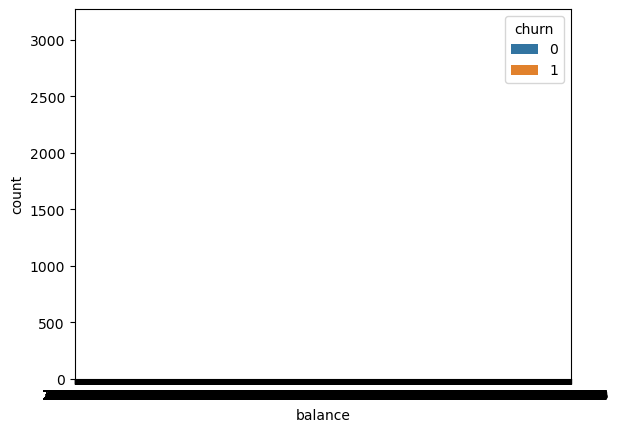

In [87]:
sns.countplot(x='balance', hue = 'churn',data = df)

<AxesSubplot: xlabel='churn', ylabel='balance'>

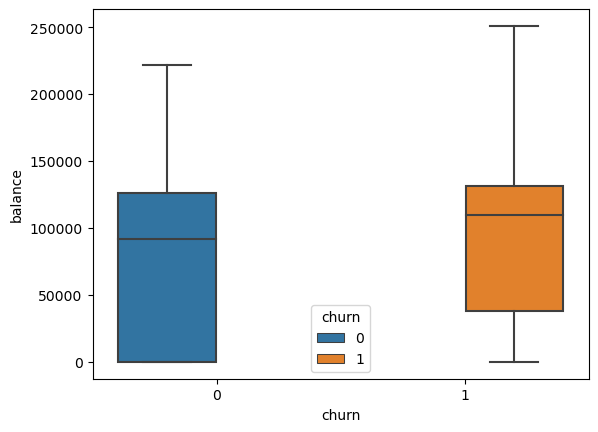

In [88]:
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = df)

products_number

In [89]:
df.products_number.value_counts(dropna=False)

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [90]:
df.groupby("products_number")["churn"].value_counts()

products_number  churn
1                0        3675
                 1        1409
2                0        4242
                 1         348
3                1         220
                 0          46
4                1          60
Name: churn, dtype: int64

<AxesSubplot: xlabel='products_number', ylabel='count'>

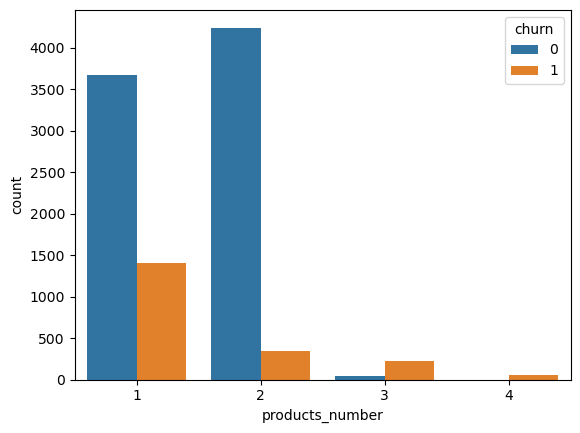

In [91]:
sns.countplot(x='products_number', hue = 'churn',data = df)

<AxesSubplot: xlabel='churn', ylabel='products_number'>

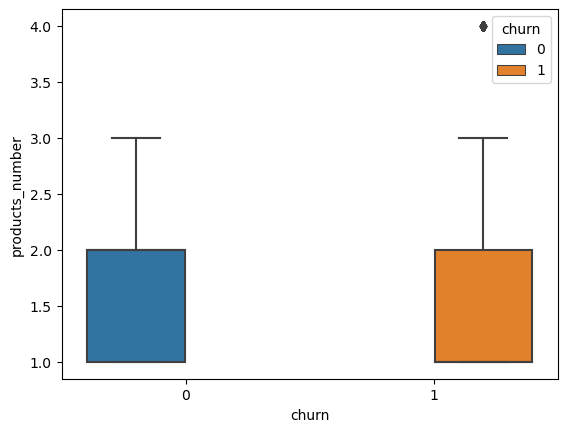

In [92]:
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = df)

credit_card

In [93]:
df.credit_card.value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

<AxesSubplot: >

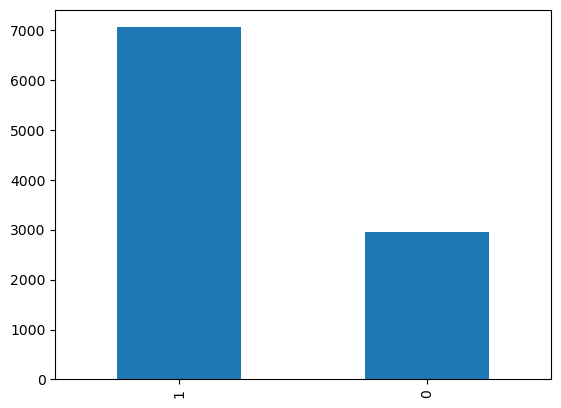

In [94]:
df.credit_card.value_counts().plot(kind="bar")

In [95]:
df.groupby("credit_card")["churn"].value_counts()

credit_card  churn
0            0        2332
             1         613
1            0        5631
             1        1424
Name: churn, dtype: int64

In [96]:
len(df[(df["credit_card"] == 0) & (df["churn"]== 1)]) / len(df[(df["credit_card"]==0)]) *100

20.814940577249573

In [97]:
len(df[(df["credit_card"] == 0) & (df["churn"]== 1)]) / len(df["credit_card"]) *100

6.13

In [98]:
len(df[(df["credit_card"] == 1) & (df["churn"]== 1)]) / len(df[(df["credit_card"]==1)]) *100

20.184266477675408

In [99]:
len(df[(df["credit_card"] == 1) & (df["churn"]== 1)]) / len(df["credit_card"]) *100

14.24

<AxesSubplot: xlabel='credit_card', ylabel='count'>

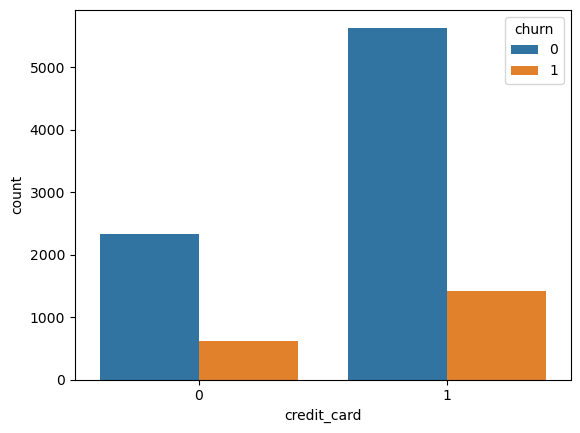

In [100]:
sns.countplot(x='credit_card', hue = 'churn',data = df)

active_member

In [101]:
df.active_member.value_counts(dropna=False)

1    5151
0    4849
Name: active_member, dtype: int64

<AxesSubplot: >

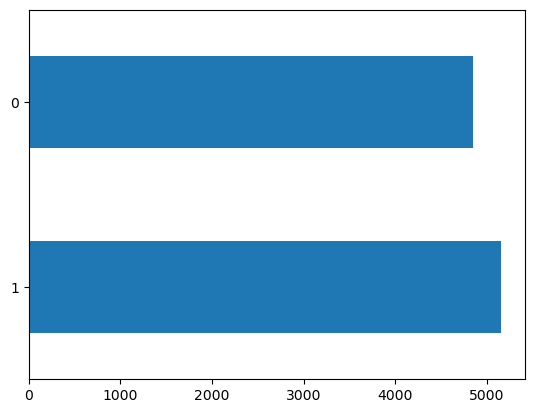

In [102]:
df.active_member.value_counts(dropna=False).plot(kind="barh")

In [103]:
df.groupby("active_member")["churn"].value_counts()

active_member  churn
0              0        3547
               1        1302
1              0        4416
               1         735
Name: churn, dtype: int64

In [104]:
len(df[(df["active_member"] == 0) & (df["churn"]== 1)]) / len(df[(df["active_member"]==0)]) *100

26.850897092183956

In [105]:
len(df[(df["active_member"] == 0) & (df["churn"]== 1)]) / len(df["active_member"]) *100

13.020000000000001

In [106]:
len(df[(df["active_member"] == 1) & (df["churn"]== 1)]) / len(df[(df["active_member"]==1)]) *100

14.269073966220153

In [107]:
len(df[(df["active_member"] == 1) & (df["churn"]== 1)]) / len(df["active_member"]) *100

7.35

<AxesSubplot: xlabel='active_member', ylabel='count'>

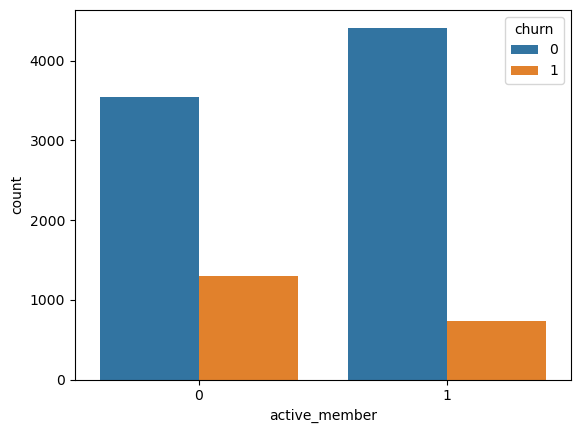

In [108]:
sns.countplot(x='active_member', hue = 'churn',data = df)

estimated_salary

In [109]:
df.estimated_salary.value_counts(dropna=False)

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: estimated_salary, Length: 9999, dtype: int64

In [110]:
df.estimated_salary.min()

11.58

In [111]:
df.estimated_salary.max()

199992.48

In [112]:
df.estimated_salary.mean()

100090.239881

In [113]:
len(df[(df["estimated_salary"]<=df.estimated_salary.mean())&(df["churn"]==1)])

995

In [114]:
len(df[(df["estimated_salary"]>=df.estimated_salary.mean())&(df["churn"]==1)])

1042

<AxesSubplot: xlabel='estimated_salary', ylabel='count'>

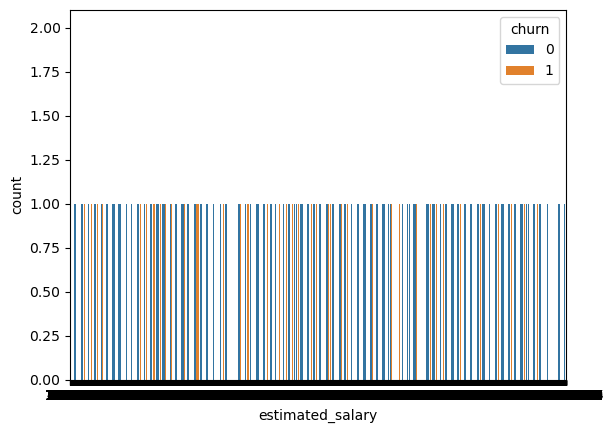

In [115]:
sns.countplot(x='estimated_salary', hue = 'churn',data = df)

<AxesSubplot: xlabel='churn', ylabel='estimated_salary'>

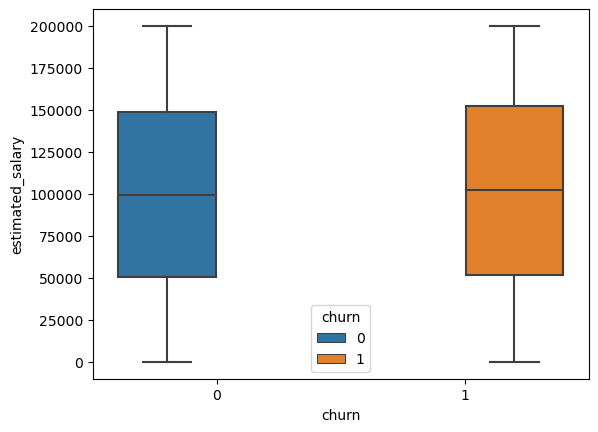

In [116]:
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = df)

get_dummies

In [117]:
#catcols = list(df.dtypes[df.dtypes == np.object_].index)
#df = pd.get_dummies(df, columns=catcols, drop_first=True)
#df.info()

numpy function setdiff1d() in line 6 removes “churn” from the list of all column names, leaving a list of the feature columns.

In [118]:
# target variables: months_active and churns

#event_column = 'churn'

# list of feature columns: excluding the target columns
#features = np.setdiff1d(df.columns, [event_column] ).tolist()
#X = df[features]
#X.tail(4)

Feature engineering

In [119]:
# Split Train, test data
df_train = df.sample(frac=0.75,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

7500
2500


(-1.0, 5.0)

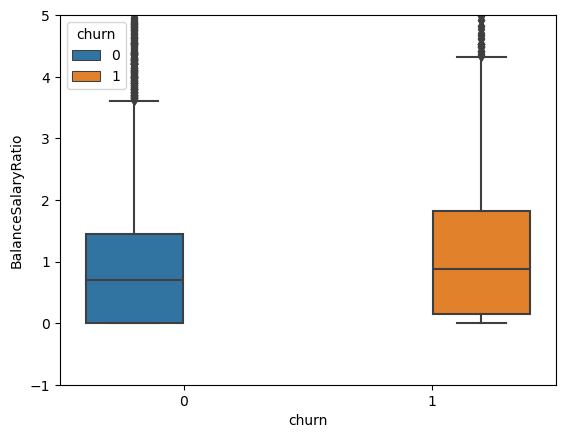

In [120]:
df_train['BalanceSalaryRatio'] = df_train.balance/df_train.estimated_salary
sns.boxplot(y='BalanceSalaryRatio',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 5)

???????????????????????????????????

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

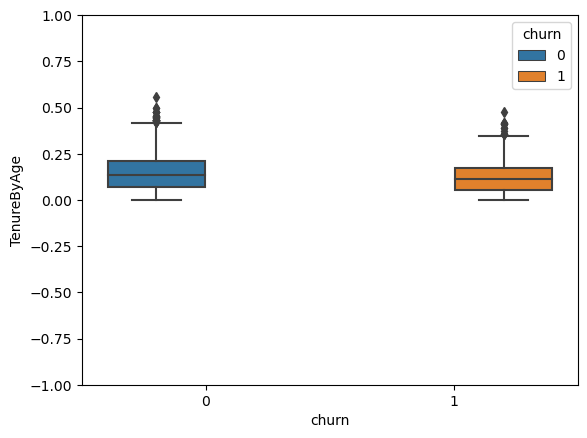

In [121]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.tenure/(df_train.age)
sns.boxplot(y='TenureByAge',x = 'churn', hue = 'churn',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [122]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.credit_score/(df_train.age)
df_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


Data prep for model fitting

In [123]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['credit_score',  'age', 'tenure', 'balance','products_number', 'estimated_salary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['credit_card', 'active_member','country', 'gender']
df_train = df_train[['churn'] + continuous_vars + cat_vars]
df_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country,gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [124]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.credit_card == 0, 'credit_card'] = -1
df_train.loc[df_train.active_member == 0, 'active_member'] = -1
df_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country,gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [133]:
# One hot encode the categorical variables
lst = ['country', 'gender']
remove = list()
for i in lst:
    if (df_train[i].dtype ==  df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_Spain,country_France,country_Germany,gender_Female,gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [134]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_Spain,country_France,country_Germany,gender_Female,gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [135]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.balance/df_predict.estimated_salary
    df_predict['TenureByAge'] = df_predict.tenure/(df_predict.age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.credit_score/(df_predict.age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','age','tenure','balance','products_number','estimated_salary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['credit_card','active_member',"country", "gender"] 
    df_predict = df_predict[['churn'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.credit_card == 0, 'credit_card'] = -1
    df_predict.loc[df_predict.active_member == 0, 'active_member'] = -1
    # One hot encode the categorical variables
    lst = ["country", "gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

Model fitting and selection

In [136]:
!pip install xgboost

In [137]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [138]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [139]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)
best_model(log_primal_Grid)

0.8134666666666668
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=10, max_iter=250, tol=1e-05)


In [140]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'churn'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.churn)
best_model(log_pol2_Grid)

0.8565333333333334
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=50, max_iter=300, solver='liblinear', tol=1e-06)


In [141]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)
best_model(SVM_grid)

0.8514666666666666
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [142]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)
best_model(SVM_grid)

0.8544
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [143]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)
best_model(RanFor_grid)

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.0001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)
best_model(xgb_grid)

c:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


2880 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\TOSHIBA\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "c:\Users\TOSHIBA\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1497, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\TOSHIBA\anaconda3\

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:country: object, gender: object

Fit best Models

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)

LogisticRegression(C=10, max_iter=250, tol=1e-05)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'churn'])
log_pol2 = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.churn)

LogisticRegression(C=50, max_iter=300, solver='liblinear')

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=9, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=7
                            ,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)

RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=7,
                       n_estimators=50)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gpu_id=-1,
              grow_policy='depthwise', max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4,  max_leaves=0, 
              monotone_constraints='()', num_parallel_tree=1, predictor='auto', gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=5, n_estimators=100,n_jobs=0, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'churn'],df_train.churn)

NameError: name 'XGBClassifier' is not defined

In [ ]:
print(classification_report(df_train.churn, log_primal.predict(df_train.loc[:, df_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5950
           1       0.64      0.24      0.35      1550

    accuracy                           0.81      7500
   macro avg       0.74      0.60      0.62      7500
weighted avg       0.79      0.81      0.78      7500



In [ ]:
print(classification_report(df_train.churn,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5950
           1       0.76      0.49      0.59      1550

    accuracy                           0.86      7500
   macro avg       0.82      0.72      0.76      7500
weighted avg       0.85      0.86      0.85      7500



In [ ]:
print(classification_report(df_train.churn,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5950
           1       0.85      0.40      0.55      1550

    accuracy                           0.86      7500
   macro avg       0.86      0.69      0.73      7500
weighted avg       0.86      0.86      0.84      7500



In [ ]:
print(classification_report(df_train.churn,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5950
           1       0.84      0.38      0.52      1550

    accuracy                           0.86      7500
   macro avg       0.85      0.68      0.72      7500
weighted avg       0.85      0.86      0.83      7500



In [ ]:
print(classification_report(df_train.churn,  RF.predict(df_train.loc[:, df_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5950
           1       0.88      0.54      0.67      1550

    accuracy                           0.89      7500
   macro avg       0.89      0.76      0.80      7500
weighted avg       0.89      0.89      0.88      7500



In [ ]:
print(classification_report(df_train.churn,  XGB.predict(df_train.loc[:, df_train.columns != 'churn'])))

XGBoostError: [15:58:20] c:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1\xgboost\xgboost-ci-windows\src\c_api\c_api_utils.h:167: Invalid missing value: "nan"

In [ ]:
y = df_train.churn
X = df_train.loc[:, df_train.columns != 'churn']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
#auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

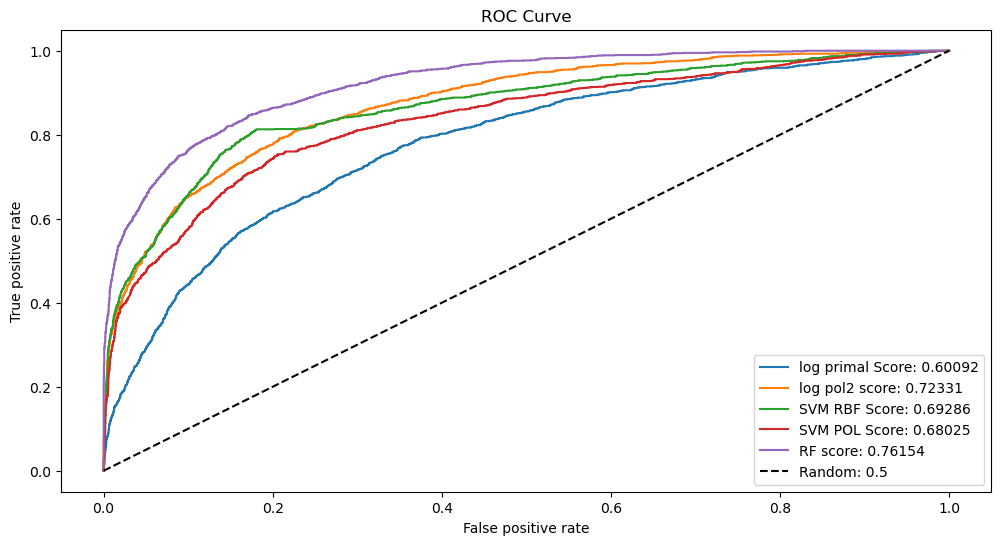

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
#plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Test model prediction accuracy on test data

In [ ]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

KeyError: "['CreditScore'] not in index"

In [ ]:
print(classification_report(df_test.churn,  RF.predict(df_test.loc[:, df_test.columns != 'churn'])))

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- country
- gender
Feature names seen at fit time, yet now missing:
- country_France
- country_Germany
- country_Spain
- gender_Female
- gender_Male




ValueError: could not convert string to float: 'France'

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.churn, RF.predict(df_test.loc[:, df_test.columns != 'churn']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'churn'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- country
- gender
Feature names seen at fit time, yet now missing:
- country_France
- country_Germany
- country_Spain
- gender_Female
- gender_Male




ValueError: could not convert string to float: 'France'